In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

In [2]:
#data = dp.getXYdata_wXYerr('data/NGC5533-rot-data_fmt.txt')
data = dp.getXYdata_wXYerr('data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#change r_dat so it's strictly increasing
r_dat, v_dat, v_err0, v_err1 = (np.asarray(list(a)) for a in zip(*sorted(zip(r_dat, v_dat, v_err0, v_err1))))
#converting v_err1 to an array
v_err1_array = np.asarray(v_err1)

print(nf.d_F(1.1,nf.h_c,nf.drho00_c,pref=1))

../python\NGC5533_functions.py:304: RuntimeWarning: overflow encountered in cosh
  return d_durho0(r, h, d_rho00)*np.power(np.cosh(z/z0(h)), -2)


-14242.83232278033


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [3]:
def f(r,M,rc,rho00,c,h,d_rho00,pref):
    return np.sqrt(nf.bh_v(r,M)**2 + nf.h_v(r,rc,rho00,load=True)**2 + c*nf.b_v(r,load=True)**2 + nf.d_v(r,h,d_rho00,pref,load=True)**2)

#def f(r,c):
#    return np.sqrt(c*nf.b_v(r,load=True)**2)

In [4]:
#Setup
weighdata = 1/v_err1
l_mod = lm.Model(f)
params = l_mod.make_params()
#Black Hole
params.add('M', value=nf.Mbh_def, min=0) #Mass
#Bulge
params.add('c', value=1, min=0)          #Contributions should all add
#params.add('n', value=nf.n_c, min=0) 
#params.add('re', value=nf.re_c, min=0) 
#Disk
params.add('h', value=nf.h_c, min=0, max=1000)
params.add('d_rho00', value=nf.drho00_c, min=0, max=1000)
params.add('pref', value=0.5, min=0, max=1000)
#Halo
params.add('rc', value=nf.h_rc, min=0)   #Radius (magnitude)
params.add('rho00', value=nf.hrho00_c, min=0) #Density (halo)

#Do fit
l_fit = l_mod.fit(v_dat,params,r=r_dat,weights=weighdata)

#Define Stuff
l_dict = l_fit.best_values
l_M = l_dict['M']
l_rc = l_dict['rc']
l_hrho00 = l_dict['rho00']
l_h = l_dict['h']
l_drho00 = l_dict['d_rho00']
l_pref = l_dict['pref']
l_c = l_dict['c']
#l_n = l_dict['n']
#l_re = l_dict['re']

l_curve = np.sqrt(nf.bh_v(r_dat,l_M)**2 + nf.h_v(r_dat,l_rc,l_hrho00,load=True)**2 + l_c*nf.b_v(r_dat,load=True)**2 + nf.d_v(r_dat,l_h,l_drho00,l_pref,load=True)**2)
#l_curve = np.sqrt(l_c*nf.b_v(r_dat,load=True)[1]**2)
#l_curve = np.sqrt(l_c*nf.b_v(r_dat,load=True)**2)

#b_curve = l_c*nf.b_v(r_dat,load=True)        #Bulge
#d_curve = nf.d_v(r_dat,l_h,l_drho00,l_pref,load=True) #Disk
#bh_curve = nf.bh_v(r_dat,l_M)                         #Black Hole
#h_curve = nf.h_v(r_dat,l_rc,l_hrho00,load=True)       #Halo
#nodisk = np.sqrt(nf.bh_v(r_dat,l_M,load=True)**2 + nf.h_v(r_dat,l_rc,l_hrho00,load=True)**2 + l_c*nf.b_v(r_dat,l_n,l_re,load=True)**2)

../python\NGC5533_functions.py:307: RuntimeWarning: invalid value encountered in double_scalars
  return 2*(ss.ellipk(d_px(r,u,xi)) - ss.ellipe(d_px(r,u,xi)))/(np.pi*np.sqrt(r*u*d_px(r,u,xi)))
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


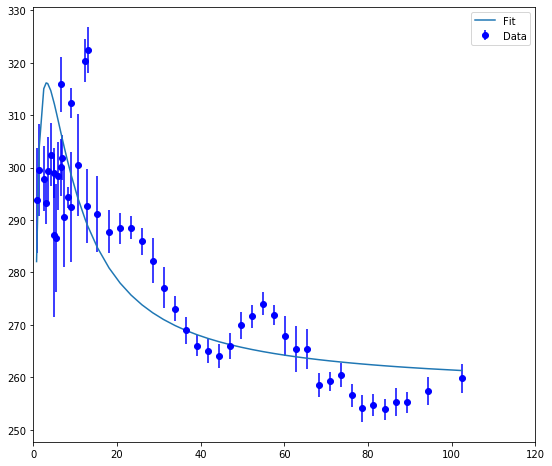

In [5]:
fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,120)
#plt.ylim(0,450)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,l_curve,label='Fit')
#plt.plot(r_dat,d_curve,label='Disk Fit')
#plt.plot(r_dat,nf.d_v(r_dat,nf.h_c,nf.drho00_c,pref=1),label='Disk: Our calculations')
#plt.plot(r_dat,nodisk,label='No Disk')
#plt.plot(r_dat,b_curve,label='Bulge Only')
#plt.plot(r_dat,bh_curve,label='Black Hole Only')
#plt.plot(r_dat,h_curve,label='Halo Only')

plt.legend()
plt.show()

l_fit

In [6]:
# Using fitted parameters to calculate parameters for Galactic Components
    
# Bulge
print('Bulge')
print('Scaling constant,         C = {:.2f}'.format(l_c))
#print('Concentration parameter,  n = {:.2f}'.format(l_n))
#print('Effective radius,         re = {:.2f} [kpc]'.format(l_re))

upsbulge = l_c * nf.b_r0(nf.n_c,nf.re_c) * nf.n_c / (4 * nf.G * nf.q * nf.b_I0(nf.n_c,nf.re_c) * (np.sqrt((np.sin(nf.i)**2)+(1/(nf.q**2))*(np.cos(nf.i)**2))))
print('Mass-to-Light Ratio,      upsdisk = {:.5e}'.format(upsbulge))

# comparing to fixed consants of re and n:
#ups2bulge = l_c * nf.b_r0(nf.n_c,nf.re_c) * nf.n_c / (4 * nf.G * nf.q * nf.b_I0(nf.n_c,nf.re_c) * (np.sqrt((np.sin(nf.i)**2)+(1/(nf.q**2))*(np.cos(nf.i)**2))))
#print('Mass-to-Light Ratio,      ups = {:.5e}'.format(ups2bulge))

#print(l_n)
#print(nf.n_c)
#print(l_re)
#print(nf.re_c)

print('')


# Disk
print('Disk')
print('Radial Scale Length,      h = {:.3f} [kpc]'.format(l_h))
print('Central Surface Density,  rho00 = {:.3e} [solar mass/kpc^3]'.format(l_drho00))
print('Scaling constant,         prefactor = {:.3f}'.format(l_pref))

r = (0.1, 125, 100)
upsdisk = l_pref * nf.d_Mdblintrho(r,nf.h_c,nf.drho00_c) / nf.L0
print('Mass-to-Light Ratio,      upsdisk = {:.5e}'.format(upsdisk))
print(nf.d_Mdblintrho(r,nf.h_c,nf.drho00_c))

print('')


# Black Hole
print('Black Hole')
print('Mass of the Black Hole,   M(bh) = {:.3e} [solar masses]'.format(l_M))
print('')


# Dark Halo
print('Dark Halo')
print('Halo central density,     rho00 = {:.3e} [solar mass/kpc^3]'.format(l_hrho00))
print('Core radius,              rc = {:.2f} [kpc]'.format(l_rc))


# Gas

Bulge
Scaling constant,         C = 1.30
Mass-to-Light Ratio,      upsdisk = 2.16180e-07

Disk
Radial Scale Length,      h = 21.961 [kpc]
Central Surface Density,  rho00 = 9.979e+02 [solar mass/kpc^3]
Scaling constant,         prefactor = 5.078


TypeError: d_Mdblintrho() takes from 0 to 2 positional arguments but 3 were given

### Necessary to use matplotlib widget, which is required for interactive stuff, in jupyterlab:

```
pip install ipympl

# If using JupyterLab
# Install nodejs: https://nodejs.org/en/download/
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension install jupyter-matplotlib
```

These are the instructions on the extension's github page: https://github.com/matplotlib/jupyter-matplotlib
but they did not work for me :( It's no longer an image but they are unresponsive.

In [ ]:
# Adding a slider to the plot using Matplotlib Slider Widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

%matplotlib widget

fig, ax = plt.subplots(figsize=(12.0,8.0))
plt.subplots_adjust(left=0.12, bottom=0.42)
#fig = plt.figure(figsize=(9.0,8.0))

l, = plt.plot(r_dat, l_curve, linewidth=1, color='blue')
plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.axis([0, 120, 0, 450])

ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
ax_M = plt.axes([0.12, 0.36, 0.79, 0.03], facecolor=axcolor)  
ax_c = plt.axes([0.12, 0.31, 0.79, 0.03], facecolor=axcolor)
#ax_n = plt.axes([0.12, 0.31, 0.79, 0.03], facecolor=axcolor)
#ax_re = plt.axes([0.12, 0.26, 0.79, 0.03], facecolor=axcolor)
ax_pref = plt.axes([0.12, 0.21, 0.79, 0.03], facecolor=axcolor)
ax_h = plt.axes([0.12, 0.16, 0.79, 0.03], facecolor=axcolor)
ax_drho00 = plt.axes([0.12, 0.11, 0.79, 0.03], facecolor=axcolor)
ax_hrho00 = plt.axes([0.12, 0.06, 0.79, 0.03], facecolor=axcolor)
ax_rc = plt.axes([0.12, 0.01, 0.79, 0.03], facecolor=axcolor)

s_M = Slider(ax_M, 'Black Hole: Mass [solar mass]', 0.1, 1.0e11, valinit=l_M, valstep=1.0e5)
s_c = Slider(ax_c, 'Bulge: Scaling Constant', 0.1, 10.0, valinit=l_c, valstep=0.1)
#s_n = Slider(ax_n, 'Bulge: Concentration Parameter', 0.1, 20.0, valinit=l_n, valstep=0.1)
#s_re = Slider(ax_re, 'Bulge: Effective Radius [kpc]', 0.1, 300.0, valinit=l_re, valstep=5.0)
s_pref = Slider(ax_pref, 'Disk: Prefactor', 0.1, 10.0, valinit=l_pref, valstep=0.1)
s_h = Slider(ax_h, 'Disk: Radial Scale Length [kpc]', 0.1, 300.0, valinit=l_h, valstep=5.0)
s_drho00 = Slider(ax_drho00, 'Disk: Central Surface Density [solar mass/kpc^3]', 0.1, 1.0e10, valinit=l_drho00, valstep=1.0e5)
s_hrho00 = Slider(ax_hrho00, 'Halo: Central Surface Density [solar mass/kpc^3]', 0.1, 1.0e12, valinit=l_hrho00, valstep=1.0e5)
s_rc = Slider(ax_rc, 'Halo: Core Radius [kpc]', 0.1, 10.0, valinit=l_rc, valstep=0.1)

def update(val):
    u_M = s_M.val
    u_c = s_c.val
    #u_n = s_n.val
    #u_re = s_re.val
    u_pref = s_pref.val
    u_h = s_h.val
    u_drho00 = s_drho00.val
    u_hrho00 = s_hrho00.val
    u_rc = s_rc.val
    l.set_ydata(np.sqrt(nf.bh_v(r_dat,l_M)**2 + nf.h_v(r_dat,l_rc,l_hrho00,load=True)**2 + l_c*nf.b_v(r_dat,load=True)[1]**2 + nf.d_v(r_dat,l_h,l_drho00,l_pref,load=True)**2))
    #l.set_ydata(nf.bh_v(r_dat,l_M))
    fig.canvas.draw_idle()

s_M.on_changed(update)
s_c.on_changed(update)
#s_n.on_changed(update)
#s_re.on_changed(update)
s_pref.on_changed(update)
s_h.on_changed(update)
s_drho00.on_changed(update)
s_hrho00.on_changed(update)
s_rc.on_changed(update)

resetax = plt.axes([0.8, 0.8, 0.1, 0.03])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    s_M.reset()
    s_c.reset()
    #s_n.reset()
    #s_re.reset()
    s_pref.reset()
    s_h.reset()
    s_drho00.reset()
    s_hrho00.reset()
    s_rc.reset()
button.on_clicked(reset)

plt.show()